In [ ]:
!pip install transformers matplotlib numpy

In [1]:
from transformers import pipeline
import matplotlib.pyplot as plt
import numpy as np

/Users/gvsh/Github/ds-notebooks/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/gvsh/Github/ds-notebooks/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def emotional_analysis(text):
    emotion_pipeline = pipeline(
        "text-classification",
        model="ayoubkirouane/BERT-Emotions-Classifier",
        top_k=None,
    )
    results = emotion_pipeline(text)
    emotion_dict = {
        result["label"]: round(result["score"] * 100, 3) for result in results[0]
    }

    return emotion_dict

In [3]:
prompts1 = [
    "A Glimpse into the Future: Imagine a world where technology can predict the most pivotal moments of our lives with precise accuracy. How does society change when people know what's coming?",
    "The Lost City of Atlantis: Describe the rediscovery of Atlantis in the modern age. Who finds it, and what secrets are unearthed from beneath the waves?",
    "A Day as a Dragon: Narrate a day in the life of a dragon living in a world where their kind is feared yet revered. What challenges do they face, and how do they interact with other mythical creatures?",
    "The Last Library on Earth: In a future where digital media has taken over, the last physical library exists as a sanctuary for the world's remaining books. Describe a day in the life of the librarian who maintains this treasure.",
    "Interstellar Message in a Bottle: An alien civilization receives a message in a bottle from Earth, floating through space as a relic of human existence. What does the message say, and how do the aliens respond?",
    "The Garden of Time: A secret garden where time moves differently from the rest of the world is discovered. What mysteries and stories does this garden hold? Who finds it, and how do they use its power?",
    "A Symphony of Dreams: In a society where dreams can be composed into music, a prodigy emerges with the ability to create symphonies that evoke profound emotions. Describe their journey to perform at the grandest stage of all.",
    "The Painter Who Could See Emotions: A painter has the unique ability to see emotions as vivid colors. How does this gift affect their art and personal relationships? Describe their most challenging commission.",
    "The Last Sunrise on Earth: Humanity is about to migrate to a new planet, and the last sunrise on Earth is approaching. Describe the emotions and events leading up to this momentous occasion.",
    "The Ghost Ship of the Arctic: A crew discovers a ghost ship frozen in the Arctic ice, perfectly preserved. What do they find aboard, and what happened to the crew?",
]

In [4]:
prompts2 = [
    "The Clockmaker's Secret: In a small village, a clockmaker creates a clock that can manipulate time. Explore the consequences of this invention on the clockmaker and the villagers.",
    "The Last Butterfly: In a world where nature has been largely destroyed, the sighting of the last butterfly leads to an unexpected journey for a group of survivors. What do they discover?",
    "The Portal in the Basement: A curious teenager discovers a portal to another dimension in their basement. Describe their adventures in this new world and the challenges they face.",
    "Whispers from the Stars: An astronomer starts receiving mysterious messages from an unknown cosmic entity. How does this change their perception of the universe and their place within it?",
    "The Painter of Dreams: An artist realizes they can bring their paintings to life, but at a cost. Dive into the moral dilemmas and the unforeseen consequences of their gift.",
    "The Library of Lost Things: A secret library contains all the objects ever lost by humans. A young librarian is chosen to manage it. What stories unfold as people come searching for their lost possessions?",
    "The City Beneath the Sea: Explorers find an ancient, submerged city that's still inhabited. How do the city's secrets and its inhabitants' way of life transform the explorers' understanding of history and humanity?",
    "Echoes of the Past: A device that allows people to hear the echoes of past events in specific locations is invented. Follow the journey of someone who uses it to solve historical mysteries.",
    "The Last Tree on Earth: In a barren future, the discovery of the last tree on Earth sparks hope and conflict. Explore the tree's impact on a divided society.",
    "The Phantom Train: A train that travels between dimensions picks up passengers who have unresolved issues in their lives. Narrate the journey of one such passenger seeking redemption."
]


In [5]:
curveDict = {
    "optimism": {
        "inputVars": ["x"],
        "function": "1.0265**x",
        "bounds": ((0, 100), (0, 100)),
    },
    "joy": {
        "inputVars": ["x"],
        "function": "abs(50*np.sin(x/48))",
        "bounds": ((-10, 160), (0, 100)),
    },
    "anticipation": {
        "inputVars": ["x"],
        "function": "x",
        "bounds": ((0, 1), (0, 1)),
    },
    "trust": {
        "inputVars": ["x"],
        "function": "np.minimum(x, 1)",
        "bounds": ((0, 6), (0, 1)),
    },
    "love": {
        "inputVars": ["x"],
        "function": "25*np.sin(x/24)",
        "bounds": ((0, 150), (0, 1)),
    },
    "fear": {
        "inputVars": ["x"],
        "function": "-abs((100/np.pi) * np.arcsin(np.sin(np.pi * x / 200)))",
        "bounds": ((0, 200), (0, 100)),
    },
    "pessimism": {
        "inputVars": ["x"],
        "function": "-1.0265**x",
        "bounds": ((0, 100), (0, 100)),
    },
    "sadness": {
        "inputVars": ["x"],
        "function": "-abs(50*np.sin(x/48))",
        "bounds": ((-10, 160), (0, 100)),
    },
    "anger": {
        "inputVars": ["x"],
        "function": "abs((50/np.pi) * np.arcsin(np.sin(np.pi * x / 25)))",
        "bounds": ((0, 200), (0, 100)),
    },
    "disgust": {
        "inputVars": ["x"],
        "function": "np.maximum(-x, -1)",
        "bounds": ((0, 6), (0, -1)),
    },
    "surprise": {
        "inputVars": ["x"],
        "function": "abs(50*np.sin(x/24))",
        "bounds": ((0, 150), (0, 100)),
    },
}

In [6]:
def curve(emotions, curveDict):
    import matplotlib.pyplot as plt
    import numpy as np

    X = np.linspace(0, 300, 100)
    Y = np.zeros(100)

    for emotion, score in emotions.items():
        bounds_x, bounds_y = curveDict[emotion]["bounds"]
        xsteps = 100

        x = np.linspace(bounds_x[0], bounds_x[1], xsteps)
        y = eval(
            curveDict[emotion]["function"], {"np": np, "abs": abs, "min": min}, {"x": x}
        )
        Y += y * score

    # Remap the graph to 0-300, 0-100
    Y = Y * 100 / np.max(Y)
    Y = np.maximum(Y, 0)

    return X,Y

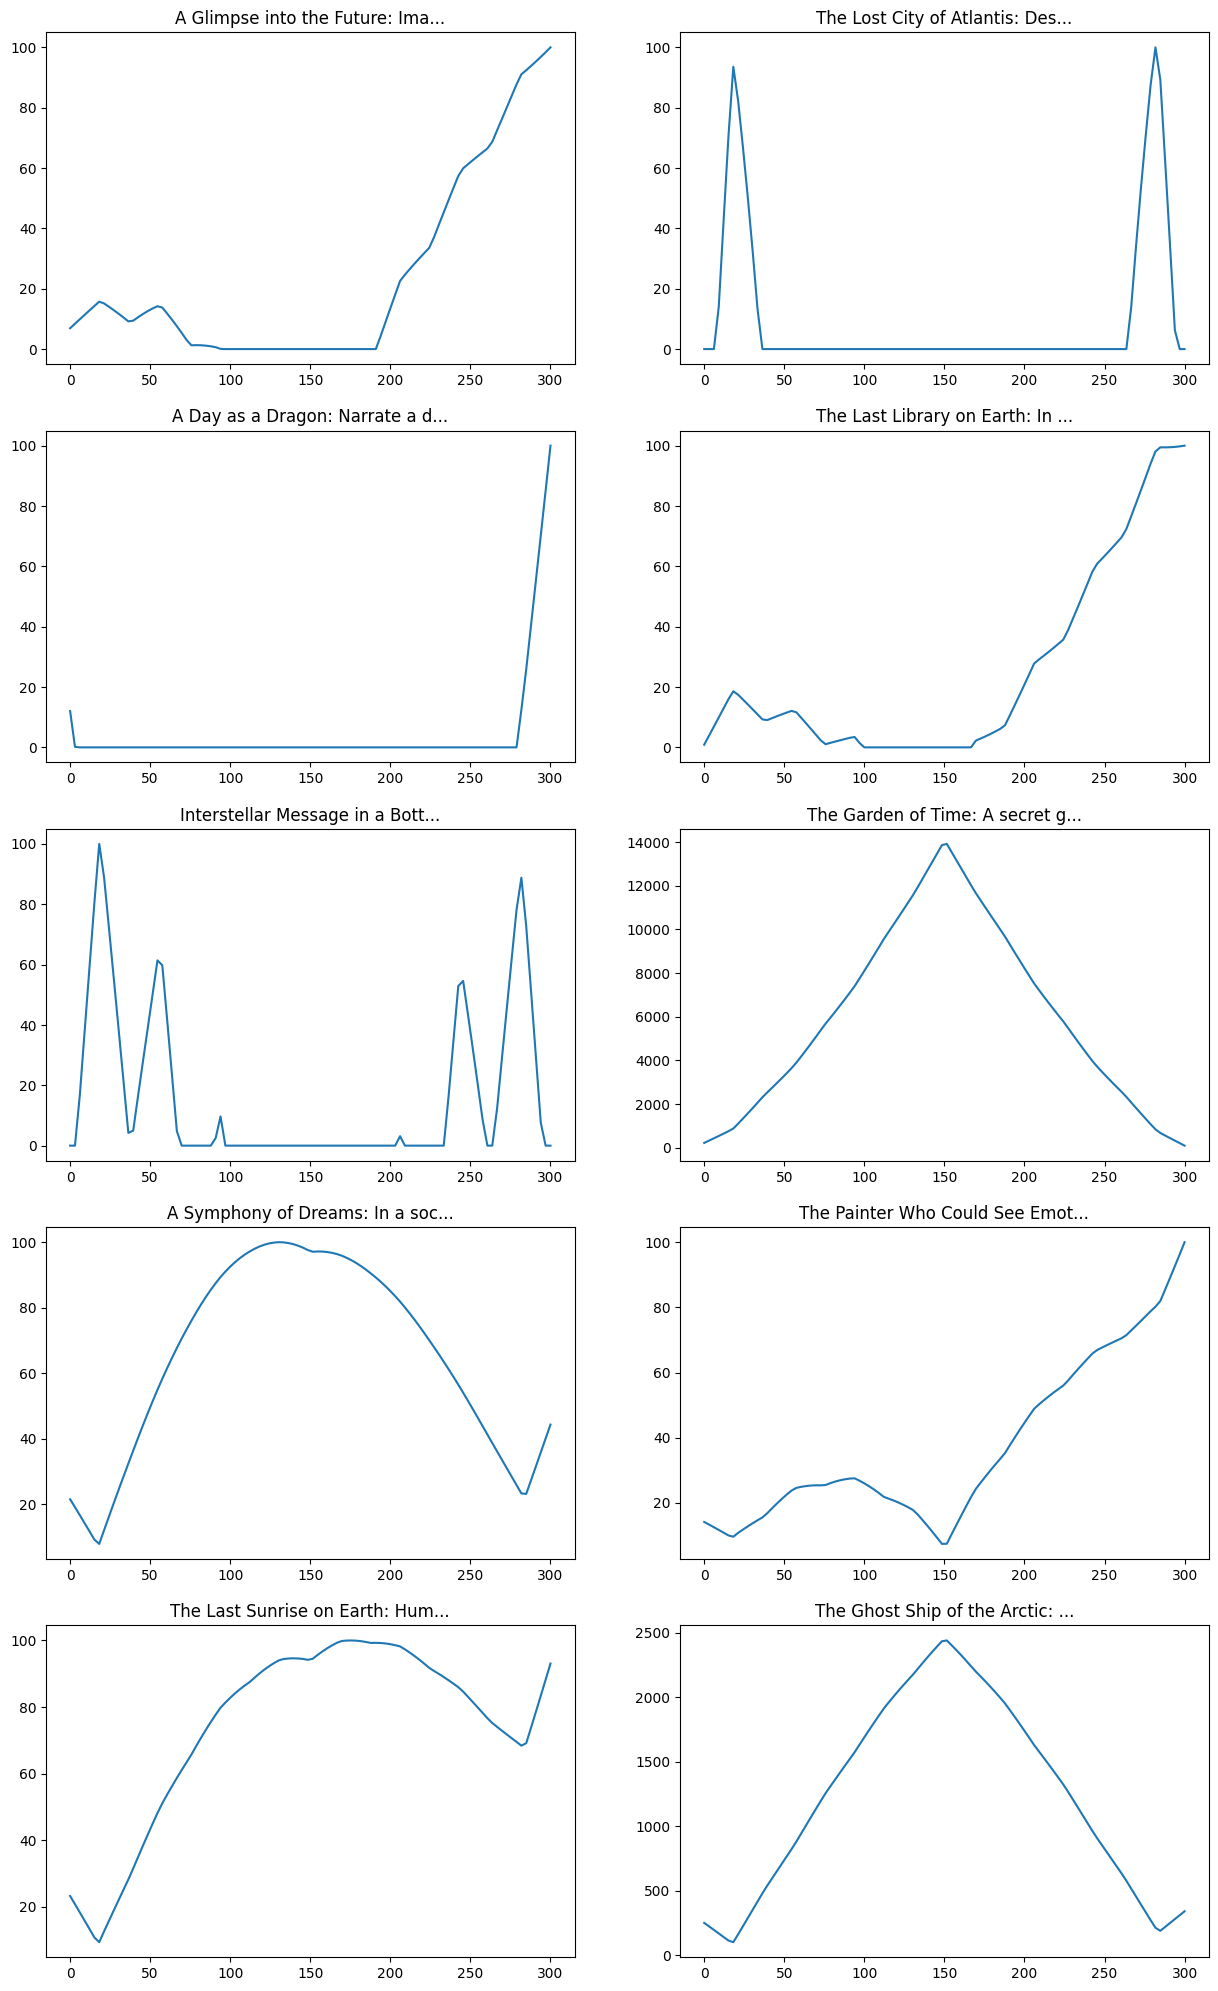

In [10]:
def plot_subplots(prompts, curveDict):
    fig, axs = plt.subplots(5, 2, figsize=(15, 25))

    for i in range(5):
        for j in range(2):
            emotions = emotional_analysis(prompts[i*2+j])
            X, Y = curve(emotions, curveDict)
            axs[i, j].plot(X, Y)
            axs[i, j].set_title(prompts[i*2+j][:30] + "...")

    plt.show()

plot_subplots(prompts1, curveDict)

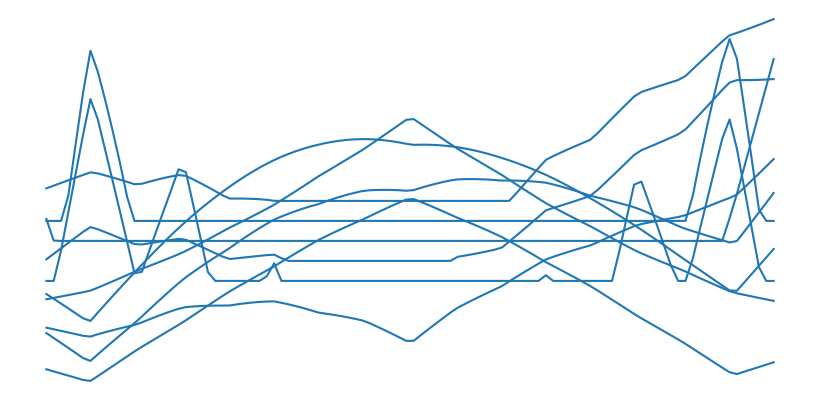

In [11]:
def plot_stack(prompts, curveDict):
    fig = plt.figure(figsize=(10, 20))

    # Initial bottom position
    bottom = 0.9
    # Height of each subplot
    height = 0.1
    # Overlap offset
    offset = 0.01

    for i, prompt in enumerate(prompts):
        # Calculate the position of the current subplot
        position = [0.1, bottom - i * offset, 0.8, height]
        
        # Add subplot with a custom position
        ax = fig.add_axes(position)

        # Set the background to None
        ax.set_facecolor('None')
        
        # Your analysis and plotting code
        emotions = emotional_analysis(prompt)
        X, Y = curve(emotions, curveDict)  # Assuming curveDict or similar is defined elsewhere
        
        ax.plot(X, Y)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.spines['left'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)

    plt.show()

plot_stack(prompts1, curveDict)